Starting coefficient (Beta) vector: [5.6877, 9571, -32361, 33075, 0, -17615, 7334]
Learning rate: 0.0005
Coefficient (Beta) vector after 25 iterations: [ 5.68775169e+00  9.57080992e+03 -3.23611683e+04  3.30748539e+04
 -1.24048461e-01 -1.76151025e+04  7.33391824e+03]


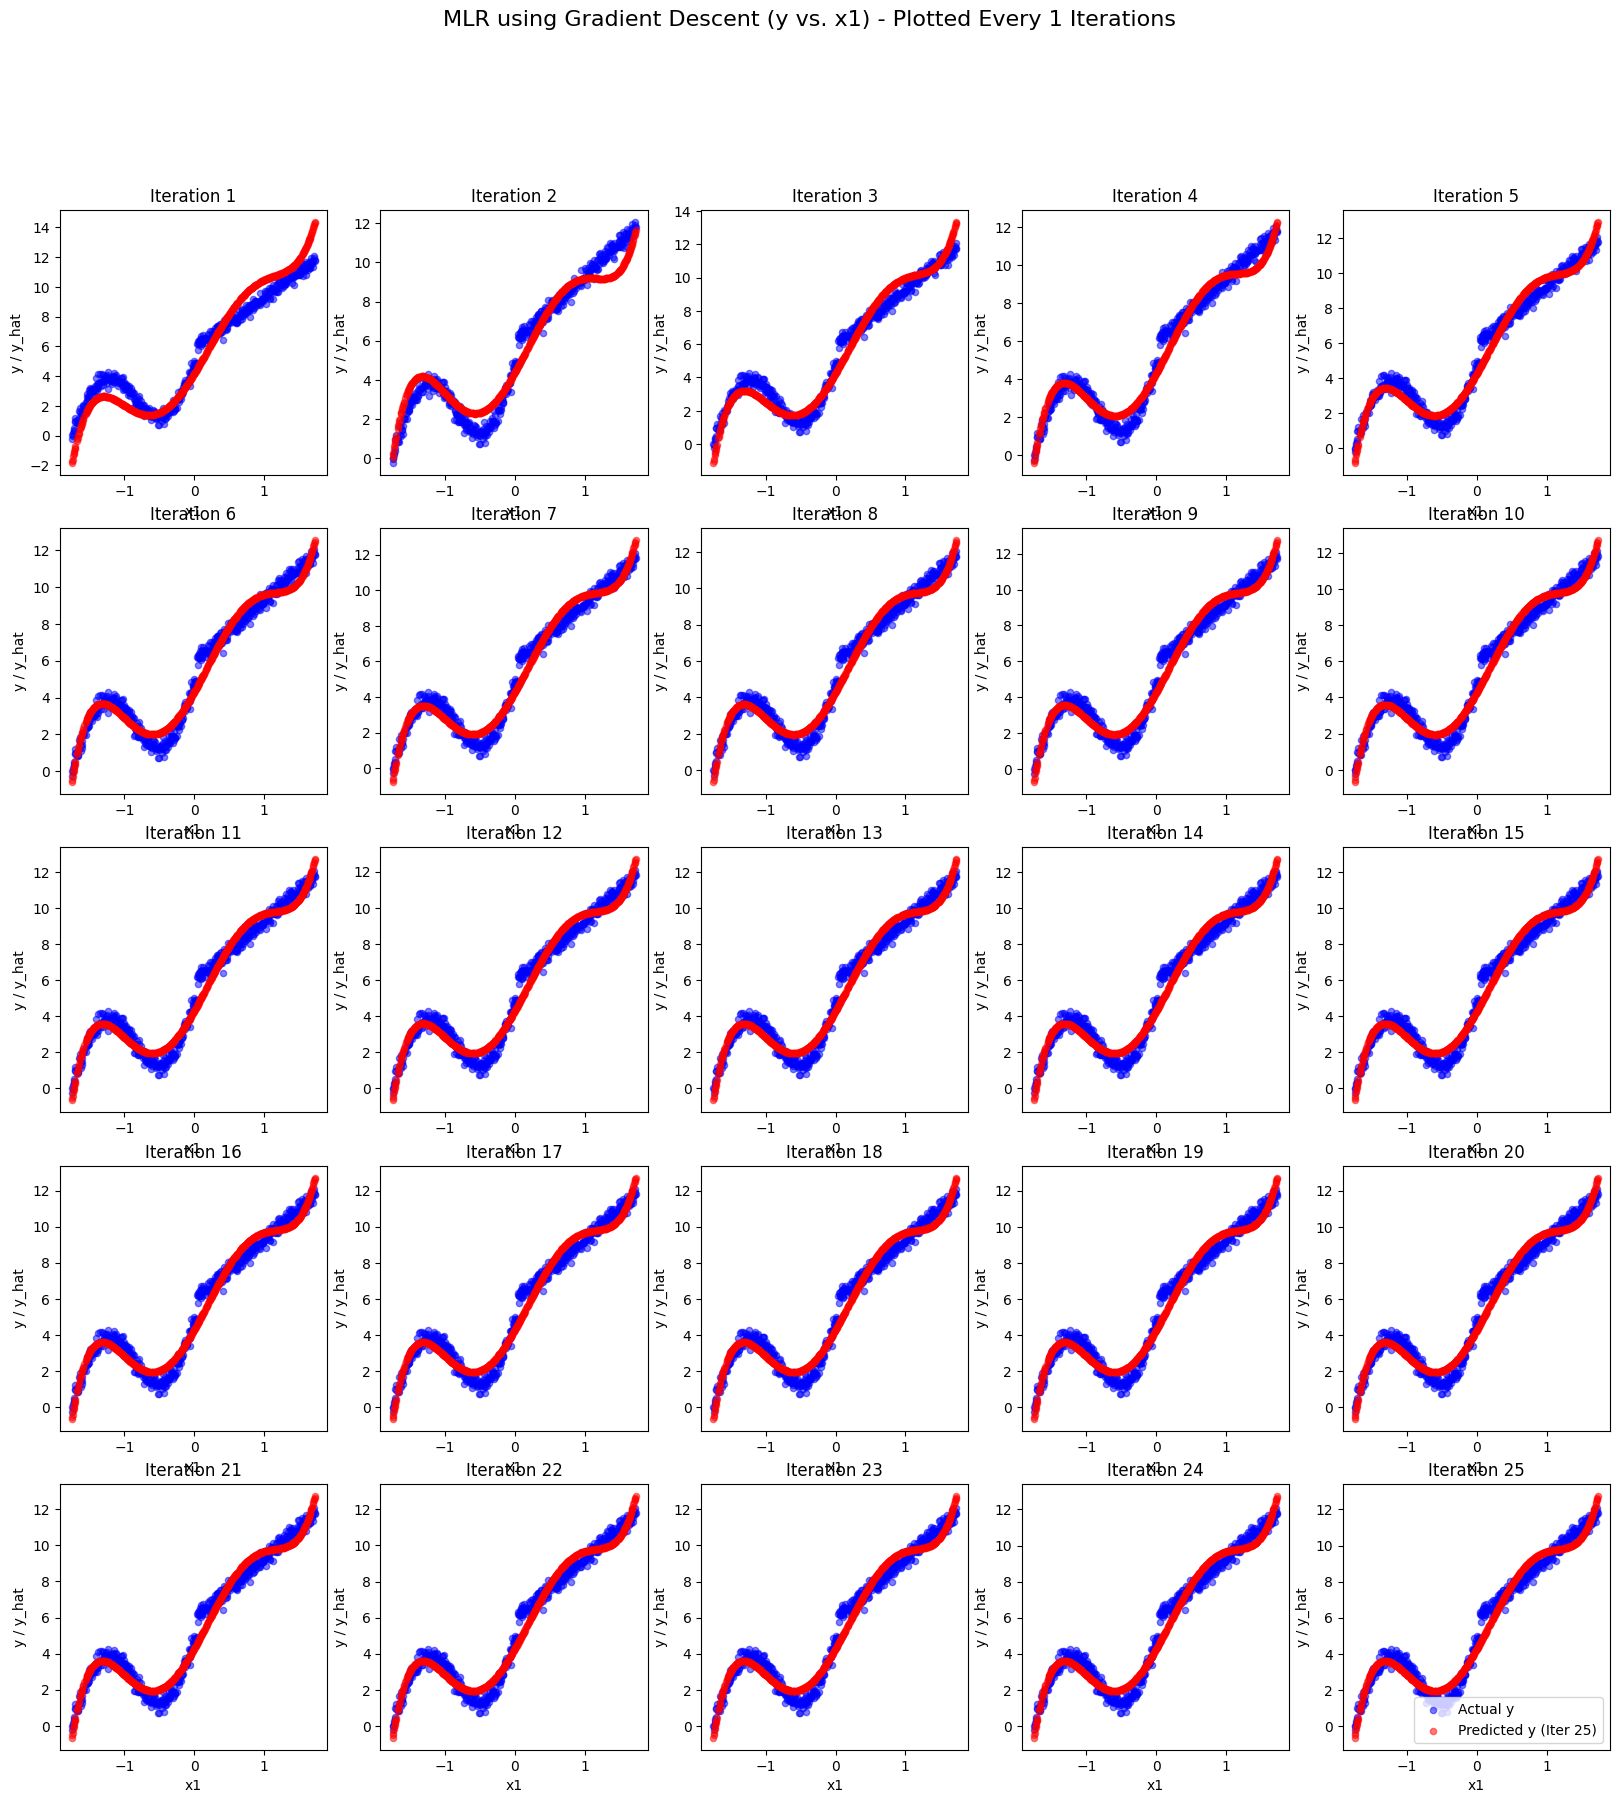

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
loc_filename = 'for-gradient-descent.xlsx'
try:
    df = pd.read_excel('for-gradient-descent.xlsx')
except FileNotFoundError:
    print(f"Error: The file {loc_filename} was not found. Please make sure it is in the same directory.")
    exit()

# Extract features and target
# Use all x_i columns as features
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
y = df['y']
n = len(y)

# Add a column of ones to X for the intercept term (beta_0)
X_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
learning_rate = 0.0005
iterations = 25
plot_frequency = 1
horiz_axis = 'x1' # All scatter plots are created w.r.t. this specified indep. variable
coeffs = None
coeffs_history = []  # List to remember coeffs vector after each iteration

# Initialize all coeffs 
#coeffs = [15, 0,0,0,0,0,0]
#coeffs = [15, 1,2,3,4,5,6]
#coeffs = np.zeros(X_with_intercept.shape[1])
#coeffs = np.ones(X_with_intercept.shape[1])
coeffs = [5.6877,9571,-32361,33075,0,-17615,7334]

print(f"Starting coefficient (Beta) vector: {coeffs}")
print(f"Learning rate: {learning_rate}")

# Set up a 5x5 grid for plots
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle(f'MLR using Gradient Descent (y vs. {horiz_axis}) - Plotted Every {plot_frequency} Iterations', fontsize=16)
axs = axs.flatten()
plot_index = 0

# Perform Gradient Descent and plot the predictions selectively 
for i in range(iterations):
    
    # Calculate predicted values using matrix multiplication
    y_hat = X_with_intercept.dot(coeffs)

    # Calculate errors
    error = y_hat - y

    # Update coeffs using the gradient descent update rule for MLR
    coeffs = coeffs - learning_rate * (X_with_intercept.T.dot(error))

    # Plot at the specified iterations ... Eg. every iteration, 1 in 10, etc....
    if (i+1) % plot_frequency == 0:
        #print(f"Iteration no ... {i}")

        # Remember the coeffs vector for this iteration
        coeffs_history.append(coeffs.copy())
        
        # # Note: The plot only shows the relationship with x1
        # # To change this, initialize the variable horiz_axis as required
        # # The predictions (y_hat) are based on all x variables.
        
        ax = axs[plot_index]
        ax.scatter(X[horiz_axis], y, label='Actual y', color='blue', s=20, alpha=0.5)
        ax.scatter(X[horiz_axis], y_hat, label=f'Predicted y (Iter {i+1})', color='red', s=20, alpha=0.5)
        ax.set_title(f'Iteration {i+1}')
        ax.set_xlabel(horiz_axis)
        ax.set_ylabel('y / y_hat')
        plot_index += 1

# # Print the values of beta after all the iterations
print(f"Coefficient (Beta) vector after {iterations} iterations: {coeffs}")

# Add a single legend to the last plot for clarity
axs[-1].legend(loc='lower right')
plt.show()

# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('gradient_descent_mlr_2500_plots.png')
# print("Plots have been generated and saved to 'gradient_descent_mlr_2500_plots.png'")

# Starting coefficient (Beta) vector: [15, 0, 0, 0, 0, 0, 0]
# Learning rate: 0.0005
# Coefficient (Beta) vector after 25 iterations: [5.69085963 0.30545071 0.43321176 0.53668762 0.61408907 0.66541102
#  0.69212419]

[]

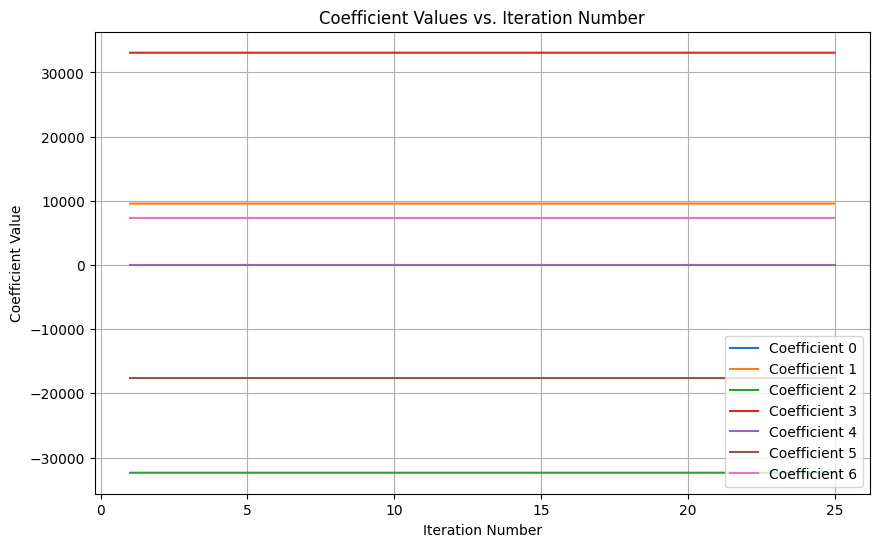

In [65]:
# Convert list of lists to numpy array for plotting
coeffs_history_np = np.array(coeffs_history)

# Plot all coefficients vs. the iteration number in a single plot
plt.figure(figsize=(10, 6))
for j in range(coeffs_history_np.shape[1]):
    plt.plot(range(1, 26), coeffs_history_np[:, j], label=f'Coefficient {j}')

plt.title('Coefficient Values vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Coefficient Value')
plt.legend(loc='lower right')
plt.grid(True)
plt.plot()

# plt.savefig('coefficients_vs_iteration.png')
# print("Plot of coefficients vs. iteration number has been generated and saved to 'coefficients_vs_iteration.png'.")

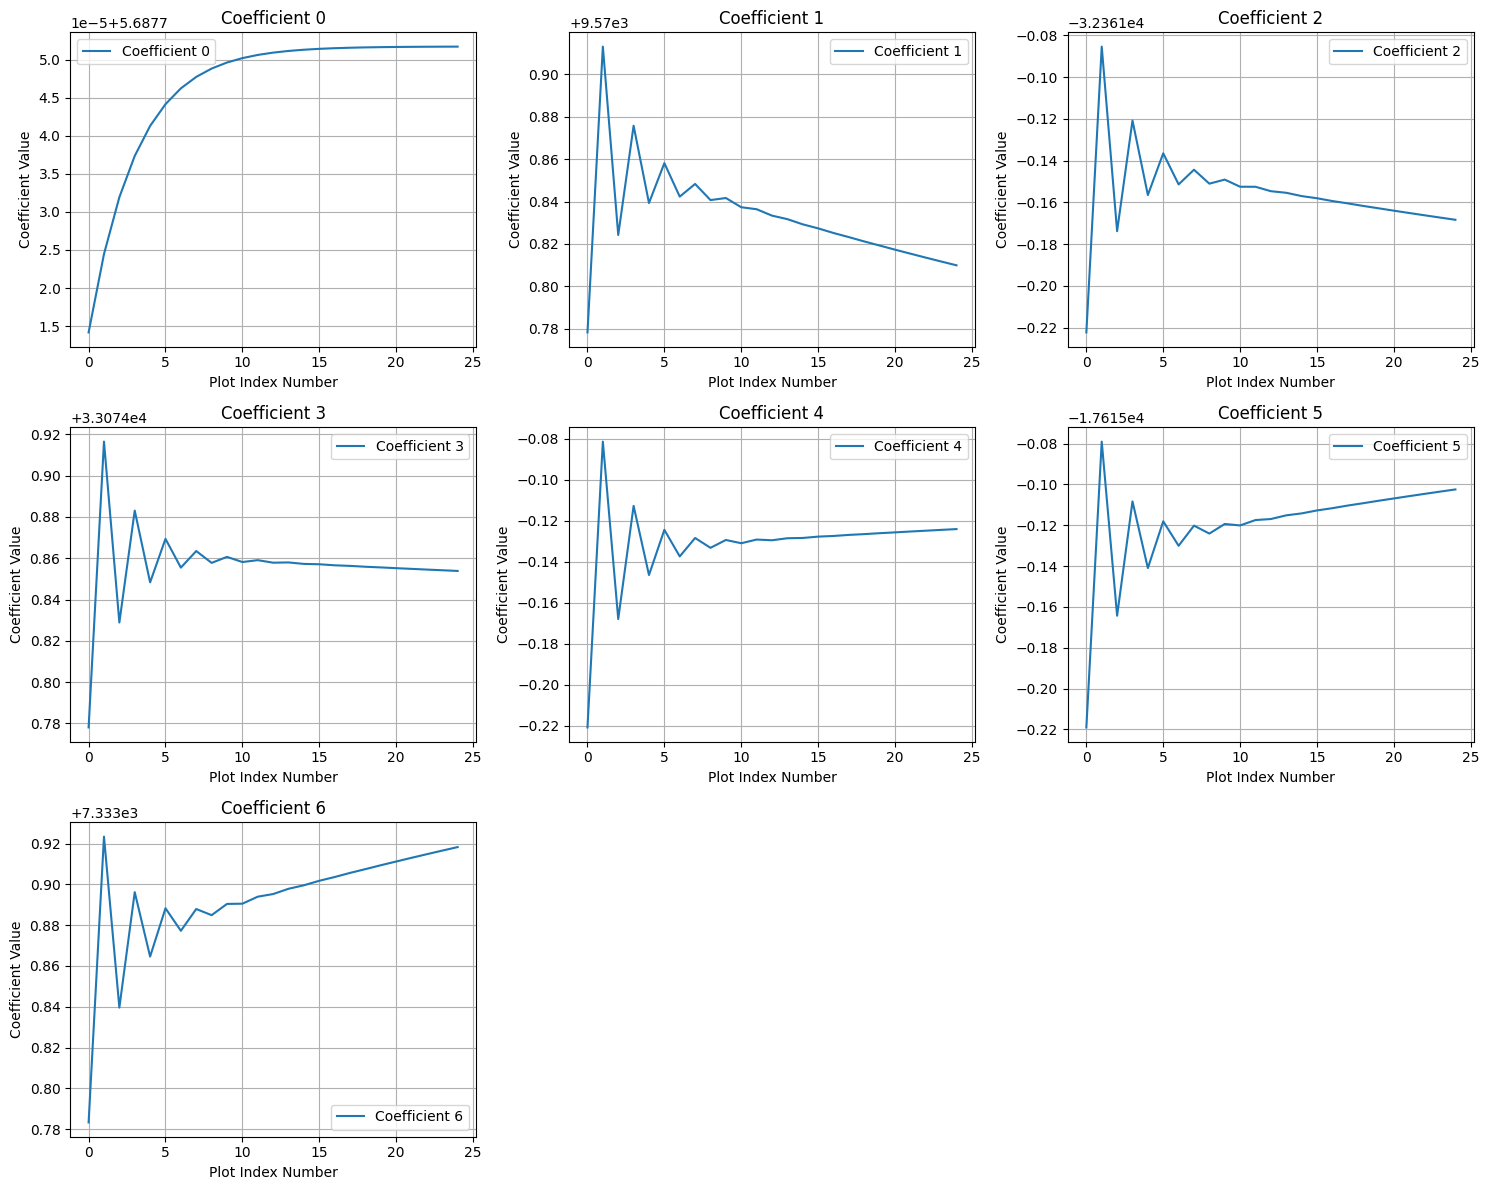

In [66]:
# Convert list of lists to numpy array for plotting
coeffs_history_np = np.array(coeffs_history)

# Determine the number of coefficients to plot
num_coeffs = coeffs_history_np.shape[1]

# Calculate the number of rows needed
num_rows = (num_coeffs + 2) // 3 # Integer division to get number of rows, ensures a row for the remainder

# Create subplots arranged in rows with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4)) # Adjust figsize for better visualization
axes = axes.flatten() # Flatten the axes array for easy iteration

# Loop through each coefficient and create a separate subplot
for j in range(num_coeffs):
    ax = axes[j] # Select the current subplot
    ax.plot(range(0, 25), coeffs_history_np[:, j], label=f'Coefficient {j}')
    ax.set_title(f'Coefficient {j}')
    ax.set_xlabel('Plot Index Number')
    ax.set_ylabel('Coefficient Value')
    ax.grid(True)
    ax.legend()

# Turn off any unused subplots
for j in range(num_coeffs, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent titles from overlapping
plt.tight_layout()
plt.show()